## 분류와 회귀
지도학습에는 분류와 회귀가 존재함<br>
가진 정보를 모두 사용해서 너무 복잡한 모델을 반드는것을 <b>과대적합</b><br>
너무 간단한 모델이 선택되는것을 <b>과소적합</b>이라고 한다.<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
import sklearn

from scipy import sparse
from IPython.display import display

/home/ssrlab/anaconda3/envs/test/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/home/ssrlab/anaconda3/envs/test/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
#폰트 깨짐 해결
plt.rc('font', family='NanumGothic')
print(plt.rcParams['font.family'])

['NanumGothic']


### forge 데이터셋은 인위적으로 만든 이진 분류 데이터 셋이다.

/home/ssrlab/anaconda3/envs/test/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
/home/ssrlab/anaconda3/envs/test/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ssrlab/anaconda3/envs/test/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


X.shape : (26, 2)


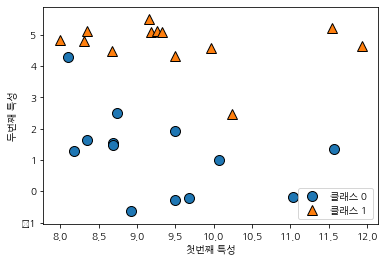

In [3]:
# 데이터셋을 만듬
X, y = mglearn.datasets.make_forge()

#산점도를 그림
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(["클래스 0 ", "클래스 1 "], loc=4)
plt.xlabel("첫번째 특성")
plt.ylabel("두번째 특성")
print("X.shape : {}" .format(X.shape))

Text(0, 0.5, '타깃')

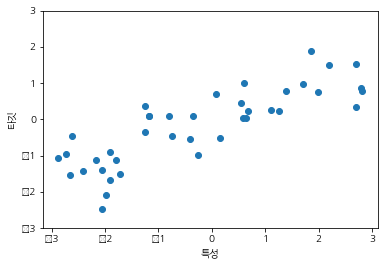

In [4]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")

## 유방암 데이터셋

In [5]:
# 데이터셋 만듬
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n {}" .format(cancer.keys()))

cancer.keys(): 
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [6]:
print("유방암 데이터의 형태 : {}" .format(cancer.data.shape))

유방암 데이터의 형태 : (569, 30)


In [7]:
print("클래스별 샘플 개수 : \n{}" .format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

클래스별 샘플 개수 : 
{'malignant': 212, 'benign': 357}


In [8]:
print("특성 이름 : \n{}" .format(cancer.feature_names))

특성 이름 : 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [9]:
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태 : \n{}" .format(boston.data.shape))

데이터의 형태 : 
(506, 13)


In [10]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape :  {}" .format(X.shape))

X.shape :  (506, 104)


# K-최근접 이웃

/home/ssrlab/anaconda3/envs/test/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
/home/ssrlab/anaconda3/envs/test/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ssrlab/anaconda3/envs/test/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


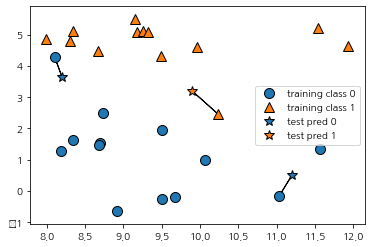

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

/home/ssrlab/anaconda3/envs/test/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
/home/ssrlab/anaconda3/envs/test/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ssrlab/anaconda3/envs/test/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


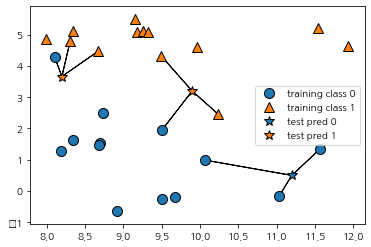

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [13]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train , X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/home/ssrlab/anaconda3/envs/test/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [14]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [15]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [16]:
print("테스트 세트 예측 : {}" .format(clf.predict(X_test)))

테스트 세트 예측 : [1 0 1 0 1 0 0]


In [17]:
print("테스트 세트 w정확도 : {:.2f}" .format(clf.score(X_test,y_test)))

테스트 세트 w정확도 : 0.86


## KNeighborsClassifier 분석